In [1]:
import os
from architecture_types import *
from tensorflow import keras

import PIL
import numpy as np
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras import layers, models, optimizers, datasets, regularizers, callbacks
from keras_lr_finder import LRFinder
import matplotlib.pyplot as plt
%matplotlib inline
import re
import sklearn.metrics as skmetrics
import tensorflow as tf
import imgaug.augmenters as iaa
import imgaug as ia
from IPython.display import SVG
from sklearn.utils import shuffle


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Set TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
class LearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        tf.summary.scalar('learning_rate', data=lr, step=epoch)

In [ ]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.GlobalAvgPool2D(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Define CNN architecture

# Compile model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

print(model.summary())

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test),
                    callbacks=[LearningRateCallback()])

# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 28, 28, 64)       

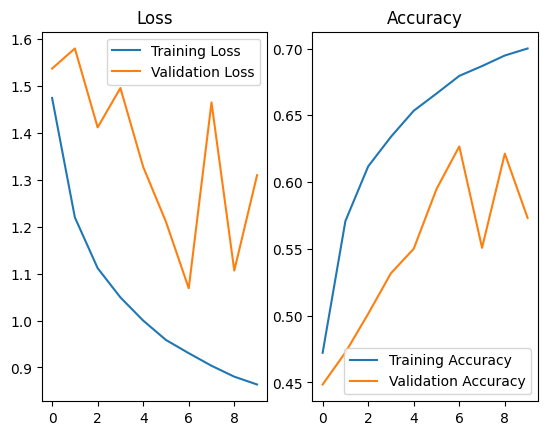

In [9]:
# Plot the training and validation loss on separate graphs
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot the training and validation accuracy on separate graphs
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [10]:
plt.plot(history.history['learning_rate'], label='Learning Rate')
plt.legend()
plt.title('Learning Rate')
plt.show()

KeyError: 'learning_rate'